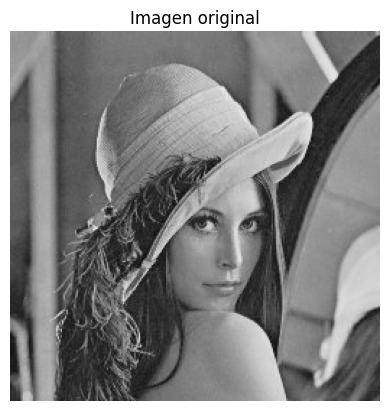

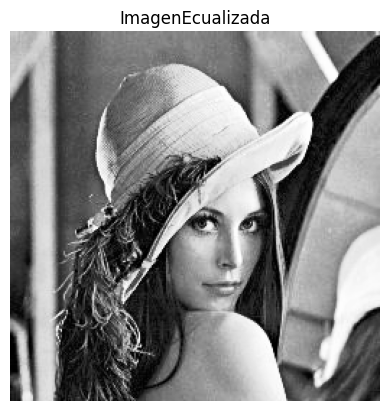

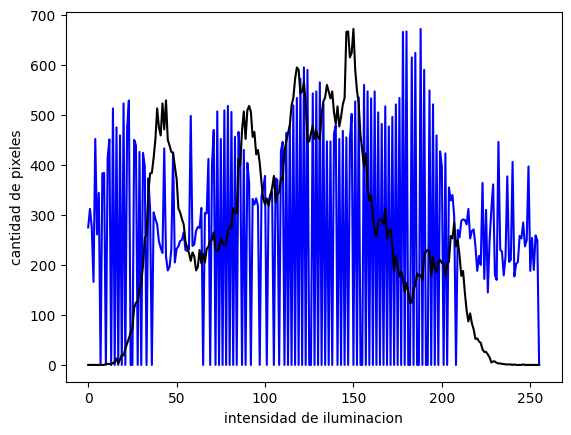

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#python3 -m pip install matplotlib

ruta_imagen = 'Lenna.png'
ruta_resultado ='equalizada.png'
imagen = cv2.imread(ruta_imagen)


if imagen is not None:

   plt.imshow(imagen)
   plt.title("Imagen original")
   plt.axis("off")  # Ocultar los ejes
   plt.show()

   imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
   nueva_imagen = np.zeros(imagen_gris.shape,dtype=np.uint8)
   altura, anchura = imagen_gris.shape[:2]

   histograma = np.zeros((1,256),dtype=np.float64)
   nuevohisto = np.zeros((1,256),dtype=np.float64)

   for x in range(0,altura):
        for y in range(0,anchura):
           histograma[0,imagen_gris[x,y]] = histograma[0,imagen_gris[x,y]] +1


   #normalizacion de histograma --> p_r(r)
   for i in range(0,256):
           histograma[0,i] = histograma[0,i] / (altura*anchura)

   #funcion acumulativa
   for i in range(0,256):
       for j in range(0,i):
           nuevohisto[0,i] = nuevohisto[0,i]+histograma[0,j]

   #mapeo de p(r) a p(s)
   for x in range(0,altura):
        for y in range(0,anchura):
           nueva_imagen[x,y] = (255 *
            (nuevohisto[0,imagen_gris[x,y]])).astype(np.uint8)

   # Convertir de BGR a RGB (OpenCV usa BGR por defecto)
   img_rgb = cv2.cvtColor(nueva_imagen, cv2.COLOR_BGR2RGB)

   #funcion de opencv que ecualiza histograma
   #nueva_imagen=cv2.equalizeHist(imagen_gris)


   plt.imshow(img_rgb)
   plt.title("ImagenEcualizada")
   plt.axis("off")  # Ocultar los ejes
   plt.show()


   hist = cv2.calcHist([nueva_imagen], [0], None, [256], [0, 256])
   plt.plot(hist, color='blue' )
   plt.xlabel('intensidad de iluminacion')
   plt.ylabel('cantidad de pixeles')

   hist = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
   plt.plot(hist, color='black' )
   plt.xlabel('intensidad de iluminacion')
   plt.ylabel('cantidad de pixeles')
   plt.show()

else:
    print('No se pudo cargar la imagen.')
